# HM1: Logistic Regression.

### Name: Atharv Subhekar



#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also, you should plot their objective values versus epochs and compare their training and testing accuracy. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [1]:
# Load Packages
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [2]:
df = pd.read_csv("data-1.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Target labels (ground truth values). After transforming from 'M' and 'B' to -1 and 1.
target = df.iloc[:,1]
target

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [5]:
# Data summary post cleaning.
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 1.2 Examine and clean data

In [6]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.

df = df.drop(columns = ['id','Unnamed: 32','diagnosis'])


In [7]:
target.replace('B', 1, inplace = True)
target.replace('M', -1, inplace = True)
target

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
564   -1
565   -1
566   -1
567   -1
568    1
Name: diagnosis, Length: 569, dtype: int64

## 1.3. Partition to training and testing sets

In [8]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machine learning.
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size = 0.2)


In [9]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
357,13.87,16.21,88.52,593.7,0.08743,0.05492,0.01502,0.020880,0.1424,0.05883,...,15.11,25.58,96.74,694.4,0.11530,0.10080,0.05285,0.05556,0.2362,0.07113
313,11.54,10.72,73.73,409.1,0.08597,0.05969,0.01367,0.008907,0.1833,0.06100,...,12.34,12.87,81.23,467.8,0.10920,0.16260,0.08324,0.04715,0.3390,0.07434
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.115500,0.1554,0.05661,...,25.68,32.07,168.20,2022.0,0.13680,0.31010,0.43990,0.22800,0.2268,0.07425
405,10.94,18.59,70.39,370.0,0.10040,0.07460,0.04944,0.029320,0.1486,0.06615,...,12.40,25.58,82.76,472.4,0.13630,0.16440,0.14120,0.07887,0.2251,0.07732
212,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.159500,0.1648,0.05525,...,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.011710,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
106,11.64,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.034850,0.1801,0.06520,...,13.14,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
159,10.90,12.96,68.69,366.8,0.07515,0.03718,0.00309,0.006588,0.1442,0.05743,...,12.36,18.20,78.07,470.0,0.11710,0.08294,0.01854,0.03953,0.2738,0.07685
455,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.032640,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675


## 1.4. Feature scaling

Use the standardization to transform both training and test features

In [10]:
# Standardization
import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0)
sig = numpy.std(x_train, axis=0)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()
print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('\ntest std = ')
print(numpy.std(x_test, axis=0))

test mean = 
[-0.09047914 -0.04944168 -0.08635903 -0.08020142  0.02082655  0.04022606
  0.01964807 -0.02403945  0.04968464  0.0728997  -0.04180162  0.11117458
 -0.0510054  -0.07284007  0.07444258  0.12518039  0.30722294  0.14899627
  0.23984968  0.18376114 -0.0937428  -0.04793218 -0.09137811 -0.07608
 -0.02635054 -0.04372924  0.01209357 -0.03503427  0.05730945 -0.04631124]

test std = 
[0.99823905 0.93580504 0.98375926 0.9326337  1.13358842 1.00449768
 0.98912977 0.9176475  1.28174825 1.2336259  0.753746   1.02642201
 0.74579658 0.629623   0.91441985 1.03362759 1.96370652 1.13486928
 1.37317963 1.55479798 0.98857145 0.9651401  0.97770094 0.93443456
 1.07165222 0.8104535  0.96553903 0.94557531 1.36826325 0.87871021]


# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistic regression and when $\lambda > 0$, it essentially becomes a regularized logistic regression.

In [11]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):
    n = x.shape[0]
    sum_1 = 0
    regularize = (lam/2) * ((np.linalg.norm(w))**2)
    for i in range(n):
        prod = np.dot(y[i]*x[i].T,w)
        sum_1 = sum_1 + np.log(1 + np.exp(-prod))
    sum_2 = sum_1 / n  
    obj = sum_2 + regularize
        
    return obj


# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [12]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    n = x.shape[0]
    sum_1 = 0
    regularize = lam * w
    for i in range(n):
        prod = np.dot(y[i]*x[i].T, w)
        sum_1 += (y[i]*x[i]) / (1 + np.exp(prod))
    sum_2 = -sum_1 / n 
    grad = sum_2 + regularize
        
    return grad

In [13]:
# Gradient descent for solving logistic regression
# You will need to do iterative processes (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    obj_val = []
    while max_epoch > 0:
        w = w - (learning_rate * gradient (w, x, y, lam))
        obj_val.append(objective(w, x, y, lam))
        max_epoch = max_epoch - 1
    return w, obj_val

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [14]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w1 = np.zeros((x_train.shape[1]))
w1 , obj_val1 = gradient_descent(x_train, y_train, 0, 0.1, w1)
print("Weights = ", w1)
print("Objective Values = ", obj_val1)

Weights =  [-0.38057755 -0.3369838  -0.37550399 -0.38446492 -0.15722494 -0.13594594
 -0.31395312 -0.38848543 -0.08807143  0.15245526 -0.38754489 -0.00154837
 -0.31557392 -0.34335667  0.00564505  0.084789    0.03410053 -0.05579149
  0.0913509   0.14948403 -0.46497533 -0.38765262 -0.44358597 -0.44764075
 -0.30198039 -0.1958858  -0.29783945 -0.38131016 -0.26551473 -0.10542146]
Objective Values =  [0.5202439208884844, 0.4340033350526585, 0.3817643145299693, 0.34603435139912736, 0.3196903584462741, 0.2992564200186306, 0.2828171441627022, 0.26922236745586947, 0.2577357718453453, 0.24786197560505033, 0.2392541903358829, 0.23166162239084895, 0.2248979087380043, 0.21882134021504804, 0.21332201162816383, 0.20831320916630774, 0.20372548065584037, 0.19950245592958504, 0.19559783912388753, 0.19197320409293162, 0.1885963516491131, 0.1854400671577627, 0.18248116821358126, 0.1796997656974725, 0.1770786839676727, 0.1746030012331358, 0.17225968174735606, 0.17003727890584777, 0.16792569363797627, 0.16591

In [15]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w1_reg = np.zeros((x_train.shape[1]))
w1_reg , obj_val1_reg = gradient_descent(x_train, y_train, 0.5, 0.1, w1_reg)
print("Weights = ", w1_reg)
print("Objective Values = ", obj_val1_reg)

Weights =  [-0.15574023 -0.11417575 -0.15550626 -0.15132704 -0.07168885 -0.08964828
 -0.13682156 -0.16054195 -0.04764639  0.03693126 -0.13324832  0.00450516
 -0.11579145 -0.11941428  0.00880679 -0.00961978 -0.02206402 -0.05037934
  0.02524427  0.02324587 -0.17820797 -0.12847042 -0.17395165 -0.16637117
 -0.11098601 -0.10413451 -0.13277906 -0.16315184 -0.10094843 -0.05834674]
Objective Values =  [0.5253947598325981, 0.4533334001179218, 0.4154268921222001, 0.3929208778662684, 0.3785470500105014, 0.36891023832892694, 0.36222130466751246, 0.3574559089827175, 0.3539911264662677, 0.35143043073794356, 0.34951223167817325, 0.3480589475920655, 0.3469471737192378, 0.3460894707804711, 0.3454228595553658, 0.34490133954642554, 0.34449090354589107, 0.34416614473437435, 0.3439079050931637, 0.34370161938351645, 0.3435361325201231, 0.343402844495802, 0.3432950852918348, 0.3432076533944438, 0.34313647206806125, 0.3430783312832812, 0.3430306925452484, 0.3429915403138364, 0.3429592682079893, 0.342932591366

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [16]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    # Objective Values
    Q = np.log(1 + np.exp(np.dot(-yi * xi.T, w)))
    regularizer_obj = (lam / 2) * (w**2)
    Q = Q + regularizer_obj
        
    # gradient
    g = -(yi * xi) / (1 + np.dot(yi * xi.T, w))
    regularizer_grad = lam * w
    g = g + regularizer_grad
    return g, Q

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [17]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=100):
    obj_val = []
    while max_epoch > 0:
        for i in range(x.shape[0]):
            grad, obj = stochastic_objective_gradient(w, x[i], y[i], lam)
        w = w - grad * learning_rate 
        obj_val.append(np.mean(obj))
        
        max_epoch = max_epoch - 1
        
    return w, obj_val

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [18]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w2 = np.zeros((x_train.shape[1]))
w2, obj_val2 = sgd(x_train, y_train, 0, 0.1, w2)
print("Weights = ", w2)
print("Objective Values = ", obj_val2)
print(len(obj_val2))

Weights =  [-0.64107927 -0.17857302 -0.68146419 -0.72623792  0.05269444 -0.7297539
 -1.21694013 -1.25270221 -0.30617973 -0.20434326 -1.01346314  0.2313105
 -1.00803811 -0.77399375 -0.71735076 -0.76156173 -0.99659709 -0.42691529
 -0.22623588 -1.06715634 -0.85089313  0.0646308  -0.9385068  -0.8477606
 -0.18848838 -0.69502504 -1.09827712 -0.7590234  -0.41538186 -1.00202758]
Objective Values =  [0.693147180559945, 0.40702872457614575, 0.28828337094156853, 0.21559077468099566, 0.16646453230889788, 0.13144005360069913, 0.10556950402298643, 0.08595805003054127, 0.07078762671842503, 0.05885833575557025, 0.04934823346831877, 0.04167755079391595, 0.03542747071954351, 0.030289354269980154, 0.02603185615618385, 0.022478994398231568, 0.019495159376634586, 0.016974646828589575, 0.014834213328075269, 0.013007694595822331, 0.011442058294290297, 0.010094471084925576, 0.008930093586338984, 0.007920404788344944, 0.0070419163057841815, 0.006275176888325655, 0.0056039952617158734, 0.005014828753419403, 0.0

In [19]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w2_reg = np.zeros((x_train.shape[1]))
w2_reg, obj_val2_reg = sgd(x_train, y_train, 0.5, 0.1, w2_reg)
print("Weights = ", w2_reg)
print("Objective Values = ", obj_val2_reg)

Weights =  [-0.19157845 -0.05336429 -0.20364697 -0.21702704  0.01574707 -0.21807774
 -0.3636672  -0.37435425 -0.09149795 -0.0610654  -0.30286067  0.06912422
 -0.30123947 -0.23129827 -0.21437122 -0.22758311 -0.29782046 -0.12757825
 -0.06760774 -0.3189062  -0.25427867  0.0193141  -0.28046091 -0.25334256
 -0.05632737 -0.20769946 -0.32820626 -0.22682456 -0.12413163 -0.2994433 ]
Objective Values =  [0.693147180559945, 0.40760244428180087, 0.2983811645472281, 0.234215743511252, 0.19209331910141905, 0.16266318764260979, 0.1412130545240337, 0.12507998633947778, 0.11264311972985934, 0.10286167249603871, 0.09503932669089571, 0.08869463560257687, 0.08348554402797902, 0.07916338387952811, 0.07554377253342401, 0.07248762012090887, 0.0698883991202844, 0.06766341158954134, 0.06574767565028156, 0.06408956775123524, 0.06264766596931103, 0.061388429886363435, 0.06028447275452426, 0.05931325923546818, 0.05845611306541192, 0.05769745321910531, 0.05702420045448979, 0.056425312233162, 0.0558914153047779, 0.

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [20]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    sum_1 = 0
    sum_2 = 0
 
    for i in range(len(xi)):
        prod = np.dot(yi[i]*xi[i].T,w)
        sum_1 += np.log(1 + np.exp(-prod))
        sum_2 += (-yi[i]*xi[i]) / (1 + np.exp(prod))
        
    sum_1 = sum_1 / len(xi)
    regularize_1 = (lam/2) * ((np.linalg.norm(w))**2)
    mbobj = sum_1 + regularize_1
    
    sum_2 = sum_2 / len(xi)
    regularize_2 = lam * w
    mbgrad = sum_2 + regularize_2
    
    return mbobj, mbgrad

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [21]:
# Create Mini Batches
def create_mini_batches(x, y, batch_size = 10):
    indices = [i for i in range(x.shape[0])]
    np.random.shuffle(indices)
    mini_batch = []
    i = 0
    while i < x.shape[0]:
        mini_batch.append(indices [i : i + batch_size -1])
        i = i + batch_size
    
    return mini_batch

In [22]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100):
    obj_val3 = []
    i = 0
    while max_epoch > 0:
        mini = create_mini_batches(x, y, 320)
        for batches in mini:
            x_mini = [x[i] for i in batches]
            y_mini = [y[i] for i in batches]
            obj_batch = []
            mbobj, mbgrad = mb_objective_gradient(w, x_mini, y_mini, lam)
            w = w - learning_rate * mbgrad
            obj_batch.append(mbobj)
        obj_val3.append(min(obj_batch))
        max_epoch = max_epoch - 1
    return w, obj_val3

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [23]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w3 = np.zeros((x_train.shape[1]))
w3, obj_val3 = mbgd(x_train, y_train, 0, 0.0001, w3)
print("Weights = ", w3)
print("Objective Values = ", obj_val3)
print(len(obj_val3))

Weights =  [-6.77539540e-03 -3.96486258e-03 -6.88933442e-03 -6.54111246e-03
 -3.72569704e-03 -5.78413899e-03 -6.77764270e-03 -7.27733364e-03
 -2.98886718e-03 -1.51409388e-04 -5.31365359e-03  7.39680787e-05
 -5.14316110e-03 -5.01518553e-03  4.64092942e-04 -3.04646467e-03
 -3.48328857e-03 -4.14403159e-03  5.64243191e-04 -1.28276618e-03
 -7.25338696e-03 -4.23728893e-03 -7.30889934e-03 -6.81644307e-03
 -4.24903175e-03 -5.57440495e-03 -6.44799720e-03 -7.41157013e-03
 -3.67293764e-03 -3.32328790e-03]
Objective Values =  [0.692934514162197, 0.6925196431063964, 0.6921934147763537, 0.6917508567533381, 0.6915326426157727, 0.6909177246005086, 0.6902261881025754, 0.6899364591625883, 0.6901690331535175, 0.6895360848974075, 0.6887907138275201, 0.6886327985019437, 0.6883379106448884, 0.6876086506313946, 0.6873088946015545, 0.6867173013799854, 0.6864102957120554, 0.6862166329172135, 0.685113977704702, 0.6855247412867281, 0.6844971104077784, 0.6840754128360313, 0.6840370071799047, 0.683504736932361, 0.

In [32]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w3_reg = np.zeros((x_train.shape[1]))
w3_reg, obj_val3_reg = mbgd(x_train, y_train, 1, 0.0001, w3_reg)
print("Weights = ", w3_reg)
print("Objective Values = ", obj_val3_reg)
print(len(obj_val3))

Weights =  [-6.70204505e-03 -3.90025148e-03 -6.81857569e-03 -6.46705725e-03
 -3.76118616e-03 -5.78281854e-03 -6.73232056e-03 -7.23212827e-03
 -2.96742223e-03 -2.24835967e-04 -5.27321858e-03  6.14137554e-05
 -5.10554739e-03 -4.97001658e-03  4.04573065e-04 -3.07649461e-03
 -3.47684619e-03 -4.15220647e-03  5.11309276e-04 -1.33687450e-03
 -7.17513398e-03 -4.17257965e-03 -7.23226418e-03 -6.73838224e-03
 -4.25719858e-03 -5.55400685e-03 -6.39815953e-03 -7.36418494e-03
 -3.64527779e-03 -3.35047014e-03]
Objective Values =  [0.6929423185550376, 0.6925077834554492, 0.6919791878387686, 0.6915334456958603, 0.691197635176766, 0.6908583373284622, 0.6904802114306419, 0.6900939613164598, 0.689744528024151, 0.6892580701863611, 0.6888208160402894, 0.6883979162029512, 0.6879004619963678, 0.6870318205539878, 0.6870616563727561, 0.6866427335054159, 0.6860316725547897, 0.6863818487888458, 0.6852603477223936, 0.6843919011364659, 0.6855887854380598, 0.6849057380414892, 0.6845538460183556, 0.6842853682535533, 0

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

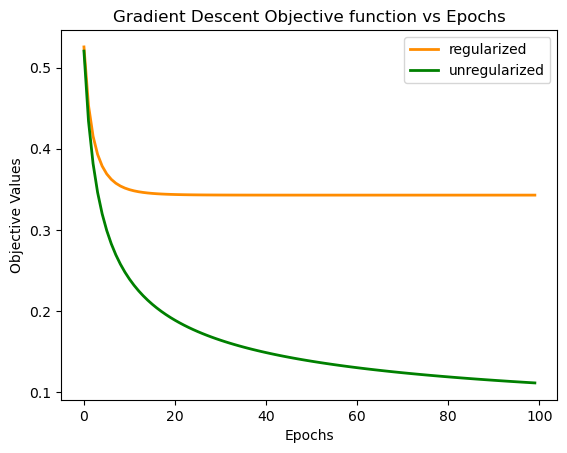

In [33]:
epochs = [i for i in range(100)]
plt.figure();
plt.plot(epochs, obj_val1_reg, color='darkorange', lw=2, label = 'regularized');
plt.plot(epochs, obj_val1, color = 'green', lw=2, label = 'unregularized')

plt.ylabel('Objective Values');
plt.xlabel('Epochs');
plt.title('Gradient Descent Objective function vs Epochs');
plt.legend();
plt.show();


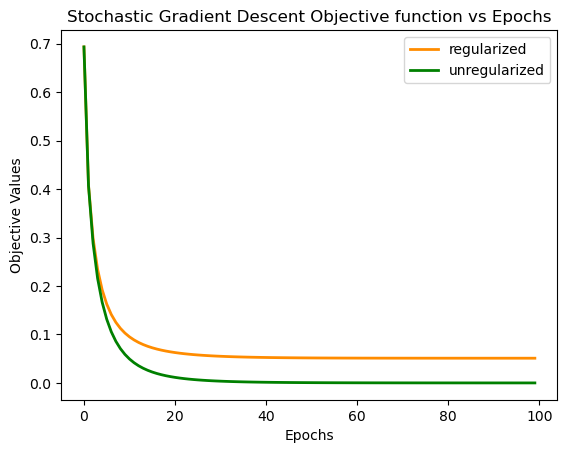

In [34]:
epochs = [i for i in range(100)]
plt.figure();
plt.plot(epochs, obj_val2_reg, color='darkorange', lw=2, label = 'regularized');
plt.plot(epochs, obj_val2, color = 'green', lw=2, label = 'unregularized')

plt.ylabel('Objective Values');
plt.xlabel('Epochs');
plt.title('Stochastic Gradient Descent Objective function vs Epochs');
plt.legend();
plt.show();

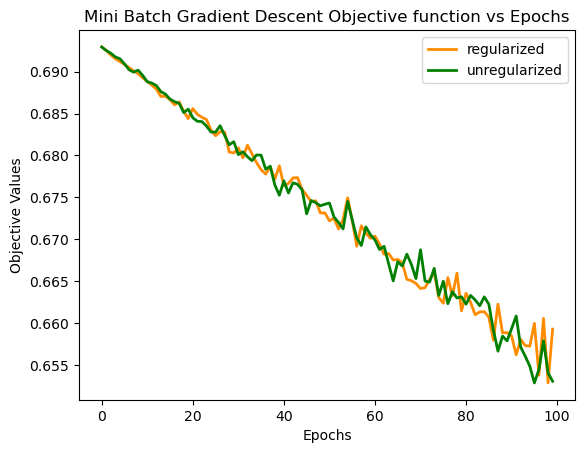

In [35]:
epochs = [i for i in range(100)]
plt.figure();
plt.plot(epochs, obj_val3_reg, color='darkorange', lw=2, label = 'regularized');
plt.plot(epochs, obj_val3, color = 'green', lw=2, label = 'unregularized')

plt.ylabel('Objective Values');
plt.xlabel('Epochs');
plt.title('Mini Batch Gradient Descent Objective function vs Epochs');
plt.legend();
plt.show();

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [36]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    y_pred = np.zeros(X.shape[0])
    
    for i in range(X.shape[0]):
        prod = np.dot(w.T,X[i])
        if prod < 0:
            y_pred[i] = -1
        else:
            y_pred[i] = 1
    return y_pred

In [42]:
# evaluate training error of logistic regression and regularized version
y_pred_train= predict(w3, x_train)
y_pred_train_reg = predict(w3_reg, x_train)
error = mean_squared_error(y_train, y_pred_train)
error_reg = mean_squared_error(y_train, y_pred_train_reg)
print("Training error with logistic regression",error)
print("Training error with logistic regression regularized",error_reg)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy_reg = accuracy_score(y_train, y_pred_train_reg)
print("Training accuracy with logistic regression ",accuracy)
print("Training accuracy with logistic regression regularized",accuracy_reg)

Training error with logistic regression 0.2989010989010989
Training error with logistic regression regularized 0.3076923076923077
Training accuracy with logistic regression  0.9252747252747253
Training accuracy with logistic regression regularized 0.9230769230769231


In [43]:
# evaluate testing error of logistic regression and regularized version
y_pred_test= predict(w3, x_test)
error= mean_squared_error(y_test, y_pred_test)
y_pred_test_reg = predict(w3_reg, x_test)
error_reg = mean_squared_error(y_test, y_pred_test)
print("Testing error with logistic regression", error)
print("Testing error with logistic regression regularized", error_reg)
accuracy = accuracy_score(y_test, y_pred_test)
accuracy_reg = accuracy_score(y_test, y_pred_test_reg)
print("Testing accuracy with logistic regression", accuracy)
print("Testing accuracy with logistic regression regularized", accuracy_reg)

Testing error with logistic regression 0.3157894736842105
Testing error with logistic regression regularized 0.3157894736842105
Testing accuracy with logistic regression 0.9210526315789473
Testing accuracy with logistic regression regularized 0.9210526315789473


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

In [44]:
lmda = [0, 0.1, 1, 10, 100]
learning = [0.0001, 0.001, 0.01, 0.1]
for i in lmda:
    for j in learning:
        print("Lambda = ", i)
        print("Learning Rate = ", j)
        w3_reg = np.zeros((x_train.shape[1]))
        w3_reg, obj_val3_reg = mbgd(x_train, y_train, i, j, w3_reg)
        y_pred_test= predict(w3, x_test)
        error= mean_squared_error(y_test, y_pred_test)
        y_pred_test_reg = predict(w3_reg, x_test)
        error_reg = mean_squared_error(y_test, y_pred_test)
        print("Testing error with logistic regression", error)
        print("Testing error with logistic regression regularized", error_reg)
        accuracy = accuracy_score(y_test, y_pred_test)
        accuracy_reg = accuracy_score(y_test, y_pred_test_reg)
        print("Testing accuracy with logistic regression", accuracy)
        print("Testing accuracy with logistic regression regularized", accuracy_reg)
        print("\n")

Lambda =  0
Learning Rate =  0.0001
Testing error with logistic regression 0.3157894736842105
Testing error with logistic regression regularized 0.3157894736842105
Testing accuracy with logistic regression 0.9210526315789473
Testing accuracy with logistic regression regularized 0.9210526315789473


Lambda =  0
Learning Rate =  0.001
Testing error with logistic regression 0.3157894736842105
Testing error with logistic regression regularized 0.3157894736842105
Testing accuracy with logistic regression 0.9210526315789473
Testing accuracy with logistic regression regularized 0.9298245614035088


Lambda =  0
Learning Rate =  0.01
Testing error with logistic regression 0.3157894736842105
Testing error with logistic regression regularized 0.3157894736842105
Testing accuracy with logistic regression 0.9210526315789473
Testing accuracy with logistic regression regularized 0.9473684210526315


Lambda =  0
Learning Rate =  0.1
Testing error with logistic regression 0.3157894736842105
Testing erro

/var/folders/y5/bwyqsmld7671hhvbb50f731m0000gn/T/ipykernel_33722/147533936.py:17: RuntimeWarning: overflow encountered in exp
  sum_1 += np.log(1 + np.exp(-prod))
/var/folders/y5/bwyqsmld7671hhvbb50f731m0000gn/T/ipykernel_33722/147533936.py:18: RuntimeWarning: overflow encountered in exp
  sum_2 += (-yi[i]*xi[i]) / (1 + np.exp(prod))
/var/folders/y5/bwyqsmld7671hhvbb50f731m0000gn/T/ipykernel_33722/147533936.py:21: RuntimeWarning: overflow encountered in double_scalars
  regularize_1 = (lam/2) * ((np.linalg.norm(w))**2)
